# Multiple Linear Regression

In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('HW2_data.csv')
print(df.shape)
df.head()

(30, 4)


,y,x1,x2,x3
0,-1.471961,1,-0.626454,-0.383425
1,4.585642,1,1.595281,1.215549
2,3.113337,1,0.487429,0.562698
3,1.018829,1,-0.305388,0.239762
4,-0.216829,1,-0.621241,-1.099278


Use the provided data set to build a multiple linear regression model

$$\large y = X \beta + \sigma \epsilon $$

1) Find the estimator $\hat\beta = (\hat{\beta_1}, \hat{\beta_2}, \hat{\beta_3})$ and the distribution of  $\hat{\beta_3}$

In [4]:
x1 = df['x1'].to_numpy()
x2 = df['x2'].to_numpy()
x3 = df['x3'].to_numpy()
y = df['y'].to_numpy()

# Get X Matrix
X = np.stack((x1,x2,x3), axis=1)
X[:10]

array([[ 1.        , -0.62645381, -0.38342467],
       [ 1.        ,  1.5952808 ,  1.21554889],
       [ 1.        ,  0.48742905,  0.56269775],
       [ 1.        , -0.30538839,  0.23976248],
       [ 1.        , -0.62124058, -1.09927837],
       [ 1.        , -0.04493361, -0.03631061],
       [ 1.        ,  0.8212212 ,  0.75302523],
       [ 1.        ,  0.7821363 ,  0.56986491],
       [ 1.        ,  0.61982575,  0.4170394 ],
       [ 1.        , -1.47075238, -1.17297169]])

$$\large \hat \beta = (X^{T} X)^{-1}X^T y $$

In [7]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
b1, b2, b3 = beta_hat
b1, b2, b3

(3,)

In [5]:
b1, b2, b3 = find_estimators(X, y)
b1, b2, b3

(0.9925764865075013, 2.0805342305653247, 0.7053498780401117)

$$\large Cov \hat \beta = \sigma^2(X^{T} X)^{-1}$$

$$\large \sigma^2 = \dfrac{1}{n-p} \hat \epsilon'\hat \epsilon$$

$$\large \hat \epsilon = y_i - \hat y_i$$

In [10]:
# Covariance as a function of sigma^2
COV_beta_hat = np.linalg.inv(X.T @ X)
COV_beta_hat

array([[ 0.03605075,  0.00886407, -0.02331968],
       [ 0.00886407,  0.30290927, -0.37437606],
       [-0.02331968, -0.37437606,  0.52489867]])

$$\large \hat \beta = (X^{T} X)^{-1}X^T y $$

## Illustration

#### Generate Synthetic Data

In [28]:
n = 100
p = 5
sigma = 1
beta = np.array([2, -1, 3, -2, 0])
X = np.random.uniform(size = (n, p))

# Create observation by adding error term
y = X @ beta + sigma * np.random.standard_normal(size = (n))

#### Get estimators

In [30]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

array([ 2.10038397, -1.42958259,  3.27161133, -1.7861101 ,  0.05160208])

#### Residuals

In [32]:
ei = y - X @ beta_hat

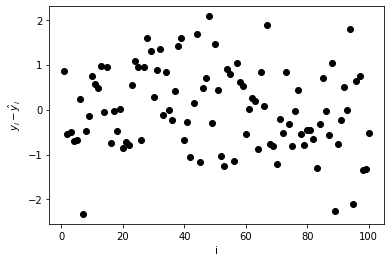

In [42]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_xlabel('i')
ax.set_ylabel(r'$y_i - \hat y_i$')
ax.scatter(range(1,len(ei)+1), ei, color = 'black')  # Plot some data on the axes

In [31]:
 X @ beta_hat

array([-0.00892626,  0.97213339,  1.22293485, -1.06172462,  0.2046839 ,
        1.23326119, -0.28384927,  1.77381446, -0.92745547,  1.93642778,
        0.87967989,  1.68554094,  1.00465578, -0.65253495, -0.52452591,
        1.12759065,  3.49068858,  1.05242895,  2.36326769,  2.54638423,
        0.08476566, -0.06441183, -1.26555202,  2.5165974 ,  2.84487436,
        3.91160879, -0.48852262,  0.71560322,  0.93101609,  2.77680797,
        0.80864496,  1.80320916, -0.68602985,  2.72136082,  2.14319109,
        0.2821969 ,  2.61065672,  0.91469697,  0.98061927,  1.05424307,
        0.25383339,  0.57599336,  1.67991361,  0.58951362,  2.51582516,
        1.35418137,  0.60175459,  1.5770266 ,  0.23863339,  1.60529202,
       -0.24117456,  2.314456  ,  2.06407381,  4.49816711,  2.24842003,
        2.254323  ,  1.14201585,  0.89575882,  2.49079387,  0.01618956,
        1.13559769,  0.39485591,  0.39477388,  1.9015508 ,  2.51067366,
       -1.13511469,  1.01604899,  2.56405562,  2.19462301,  2.68

In [6]:
x_x_T = np.array([[11, 22],
                  [22, 51]])

In [21]:
u, s, vh = np.linalg.svd(x_x_T)
print(u)
print(u.shape)
print()
print(np.sqrt(np.diag(s)))
print(s.shape)
print()
print(vh)
print(vh.shape)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)

[[7.79308267 0.        ]
 [0.         1.12599401]]
(2,)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)


In [18]:
u, s, vh = np.linalg.svd(x_x_T, full_matrices=True)
print(u)
print(u.shape)
print()
print(s)
print(s.shape)
print()
print(vh)
print(vh.shape)
print()
print()
print(u @ np.diag(s) @ vh)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)

[60.73213749  1.26786251]
(2,)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)


[[11. 22.]
 [22. 51.]]


In [19]:
x_x_T

array([[11, 22],
       [22, 51]])

In [17]:
u, s, vh = np.linalg.svd(x_x_T, full_matrices=False)
print(u)
print(u.shape)
print()
print(s)
print(s.shape)
print()
print(vh)
print(vh.shape)
print()
print()
print(u @ s @ vh)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)

[60.73213749  1.26786251]
(2,)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
(2, 2)


[60.73213749  1.26786251]
